In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("../input"))



['mi2023-practice']


In [4]:
#Reading the csv file for train dataset
train = pd.read_csv("/kaggle/input/mi2023-practice/train.csv")

In [5]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 2 columns):
Image    9850 non-null object
Id       9850 non-null object
dtypes: object(2)
memory usage: 154.0+ KB


In [6]:

train.describe()

,Image,Id
count,9850,9850
unique,9850,4251
top,75324ffe.jpg,new_whale
freq,1,810


In [7]:
# put labels into y_train variable
y_train = train["Id"]
# Drop the 'Id' column
xtrain = train.drop(labels = ["Id"], axis = 1)
xtrain.head()

,Image
0,00022e1a.jpg
1,000466c4.jpg
2,00087b01.jpg
3,001296d5.jpg
4,0014cfdf.jpg


In [8]:
# Indicates sum of values in our data
train.isnull().sum()

Image    0
Id       0
dtype: int64

In [9]:
# importing the libraries for image preprocessing
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

Using TensorFlow backend.


In [10]:
def prepareImages(train, shape, path):
    
    x_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    for fig in train['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img("/kaggle/input/mi2023-practice/train/"+path+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [ ]:
x_train = prepareImages(train, train.shape[0], "train")

Processing image:  1 ,  00022e1a.jpg
Processing image:  501 ,  0c64ae81.jpg
Processing image:  1001 ,  19546e12.jpg
Processing image:  1501 ,  27e1c585.jpg
Processing image:  2001 ,  34453b91.jpg
Processing image:  2501 ,  414cb204.jpg
Processing image:  3001 ,  4e7b614f.jpg
Processing image:  3501 ,  5b1823d1.jpg
Processing image:  4001 ,  68d47887.jpg
Processing image:  4501 ,  74f20dc3.jpg
Processing image:  5001 ,  81c129dd.jpg
Processing image:  5501 ,  8e84444c.jpg
Processing image:  6001 ,  9c8173f2.jpg
Processing image:  6501 ,  a899eaba.jpg
Processing image:  7001 ,  b5c23b76.jpg


In [15]:
x_train = x_train / 255.0 
print("xtrain shape: ",x_train.shape)

xtrain shape:  (9850, 100, 100, 3)


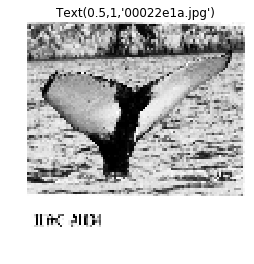

In [16]:
# Checking example input image
plt.imshow(x_train[0][:,:,0], cmap="gray")
plt.title(plt.title(train.iloc[0,0]))
plt.axis("off")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
#Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)

In [19]:
# let's look at first 10 values
y_train[0:10]  

array([3741,  310, 3613,  418, 4012, 2332, 3889,    0,  991, 1341])

In [20]:
# finding shape of y_train data
y_train.shape

(9850,)

In [21]:
# convert to one-hot-encoding


from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 5005)

In [25]:
y_train.shape

(9850, 5005)

In [22]:
y_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(BatchNormalization())

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation = "softmax"))

In [24]:
#Provides the summary of model we created
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
__________

In [26]:
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [27]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images horizontally
        vertical_flip=False)  # randomly flip images vertically


datagen.fit(x_train)

In [28]:
epochs = 50  
batch_size = 64

In [29]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=50, verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size) 

Epoch 1/50
 - 26s - loss: 8.3507 - acc: 0.0405
Epoch 2/50
 - 21s - loss: 7.4578 - acc: 0.0539
Epoch 3/50
 - 22s - loss: 6.7956 - acc: 0.0668
Epoch 4/50
 - 22s - loss: 6.2716 - acc: 0.0748
Epoch 5/50
 - 22s - loss: 5.7731 - acc: 0.0868
Epoch 6/50
 - 21s - loss: 5.3077 - acc: 0.1011
Epoch 7/50
 - 22s - loss: 4.8367 - acc: 0.1265
Epoch 8/50
 - 22s - loss: 4.3729 - acc: 0.1674
Epoch 9/50
 - 22s - loss: 3.9000 - acc: 0.2094
Epoch 10/50
 - 22s - loss: 3.5132 - acc: 0.2720
Epoch 11/50
 - 22s - loss: 3.1092 - acc: 0.3355
Epoch 12/50
 - 21s - loss: 2.7301 - acc: 0.3990
Epoch 13/50
 - 22s - loss: 2.4469 - acc: 0.4534
Epoch 14/50
 - 22s - loss: 2.1535 - acc: 0.5022
Epoch 15/50
 - 21s - loss: 1.9352 - acc: 0.5399
Epoch 16/50
 - 22s - loss: 1.7106 - acc: 0.5935
Epoch 17/50
 - 22s - loss: 1.5337 - acc: 0.6274
Epoch 18/50
 - 21s - loss: 1.3792 - acc: 0.6600
Epoch 19/50
 - 22s - loss: 1.2416 - acc: 0.6965
Epoch 20/50
 - 22s - loss: 1.1188 - acc: 0.7263
Epoch 21/50
 - 22s - loss: 1.0473 - acc: 0.7399
E

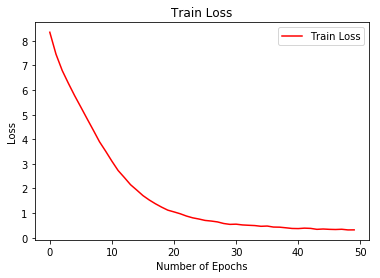

In [30]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label="Train Loss")
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

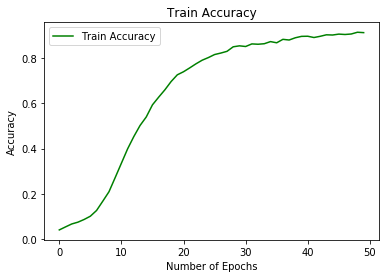

In [31]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label="Train Accuracy")
plt.title("Train Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
# finding the training accuracy 
print('Train accuracy of the model: ',history.history['acc'][-1])

Train accuracy of the model:  0.9128346616520658


In [33]:
# finding the training loss 
print('Train loss of the model: ',history.history['loss'][-1])

Train loss of the model:  0.3170788389802491
